# Stathub 2.0 - Premier League Prediction

2) Prediction Model Creation

In [10]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
data = pd.read_csv("PremDataProcessed.csv")

Mean Absolute Error: 3.338742163005391


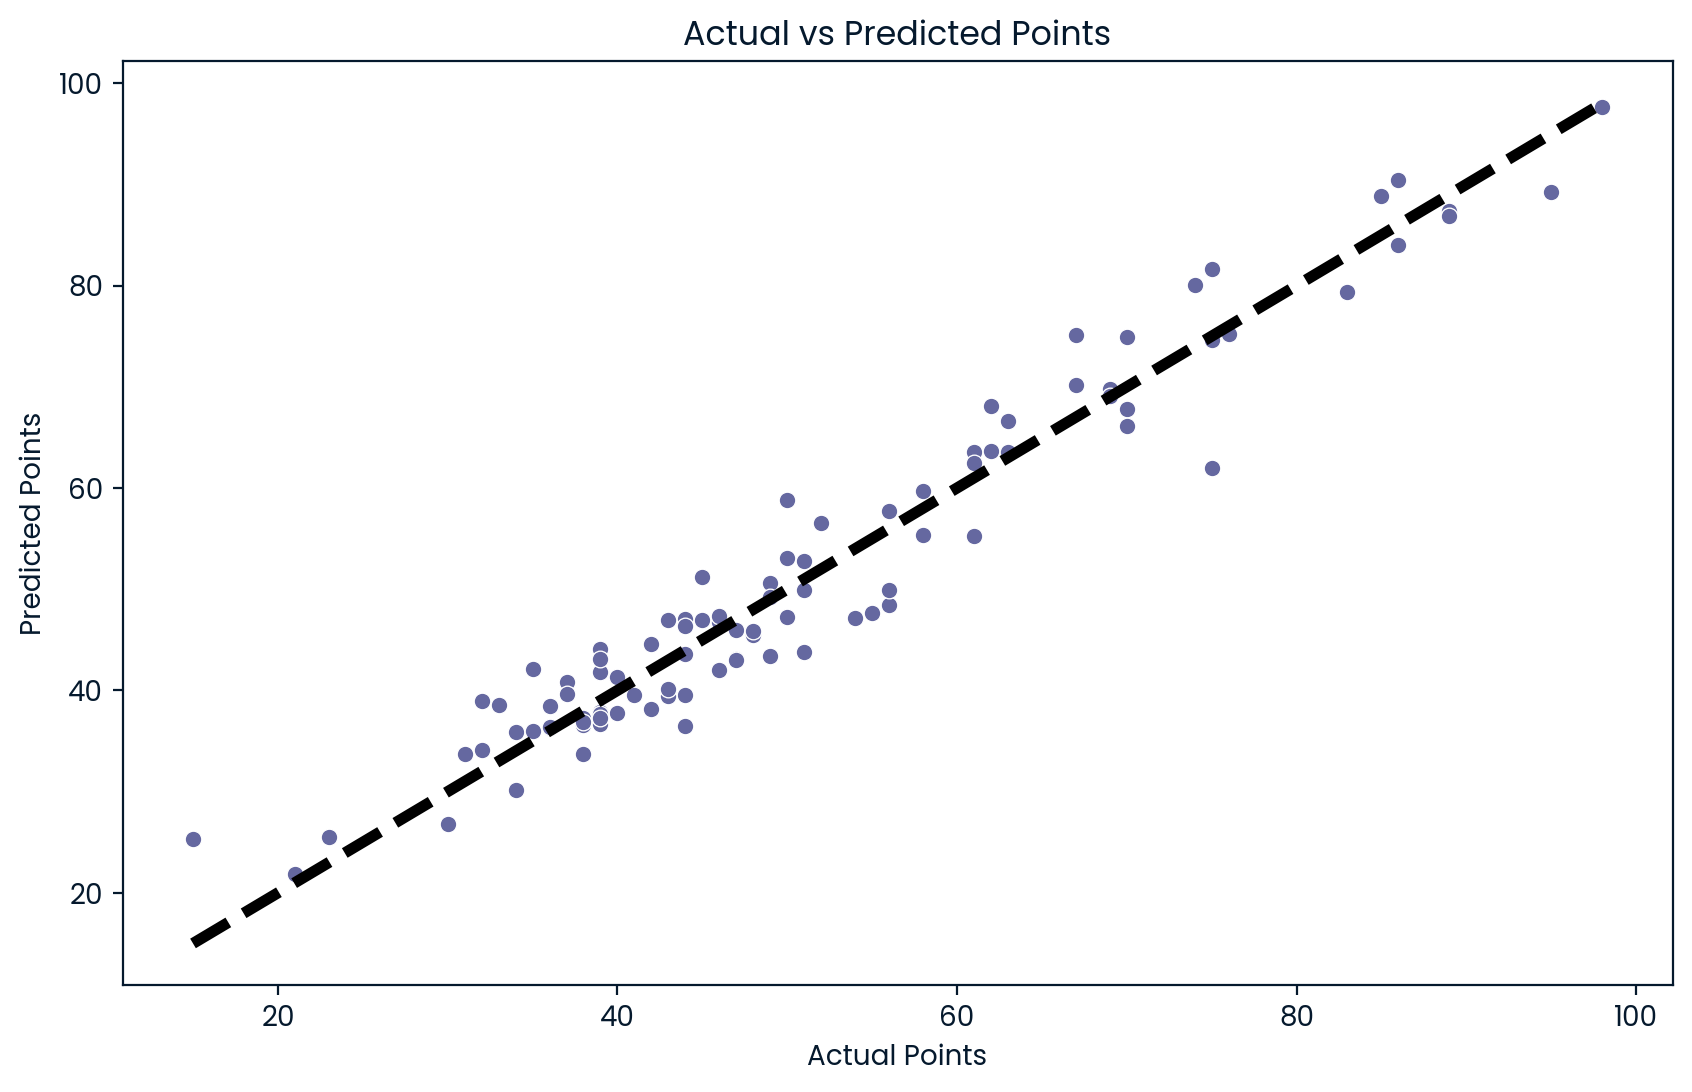

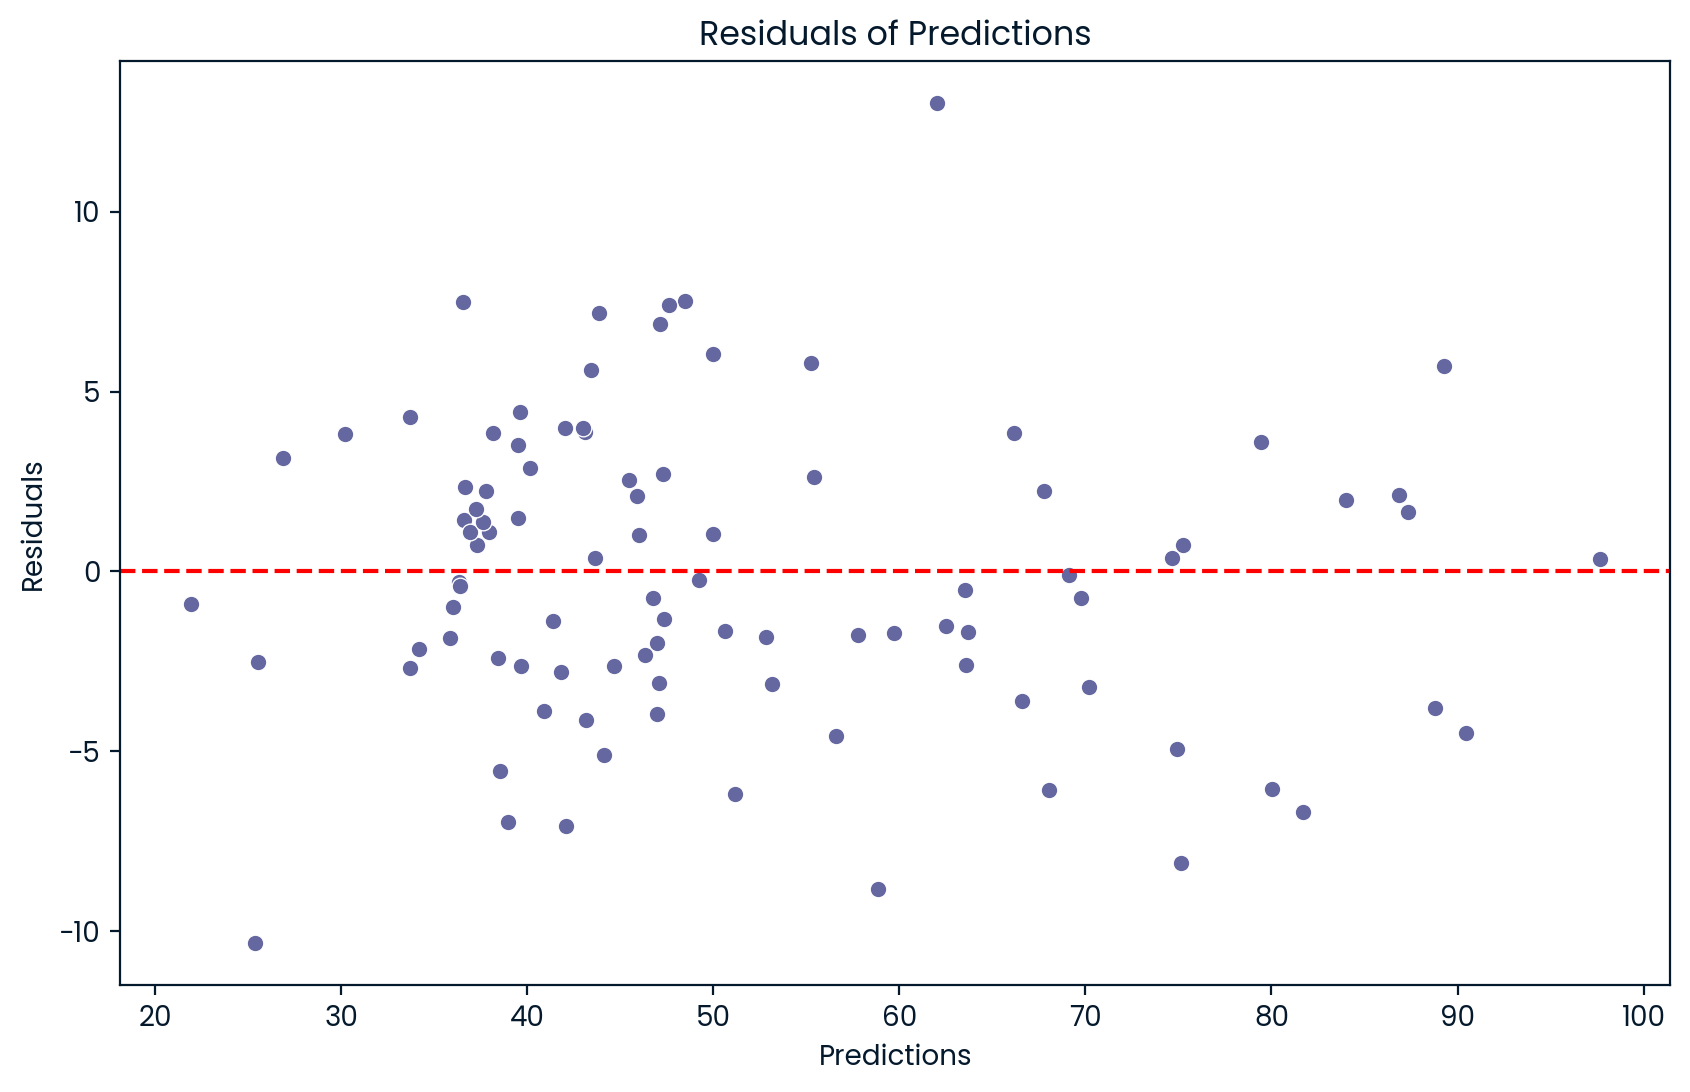

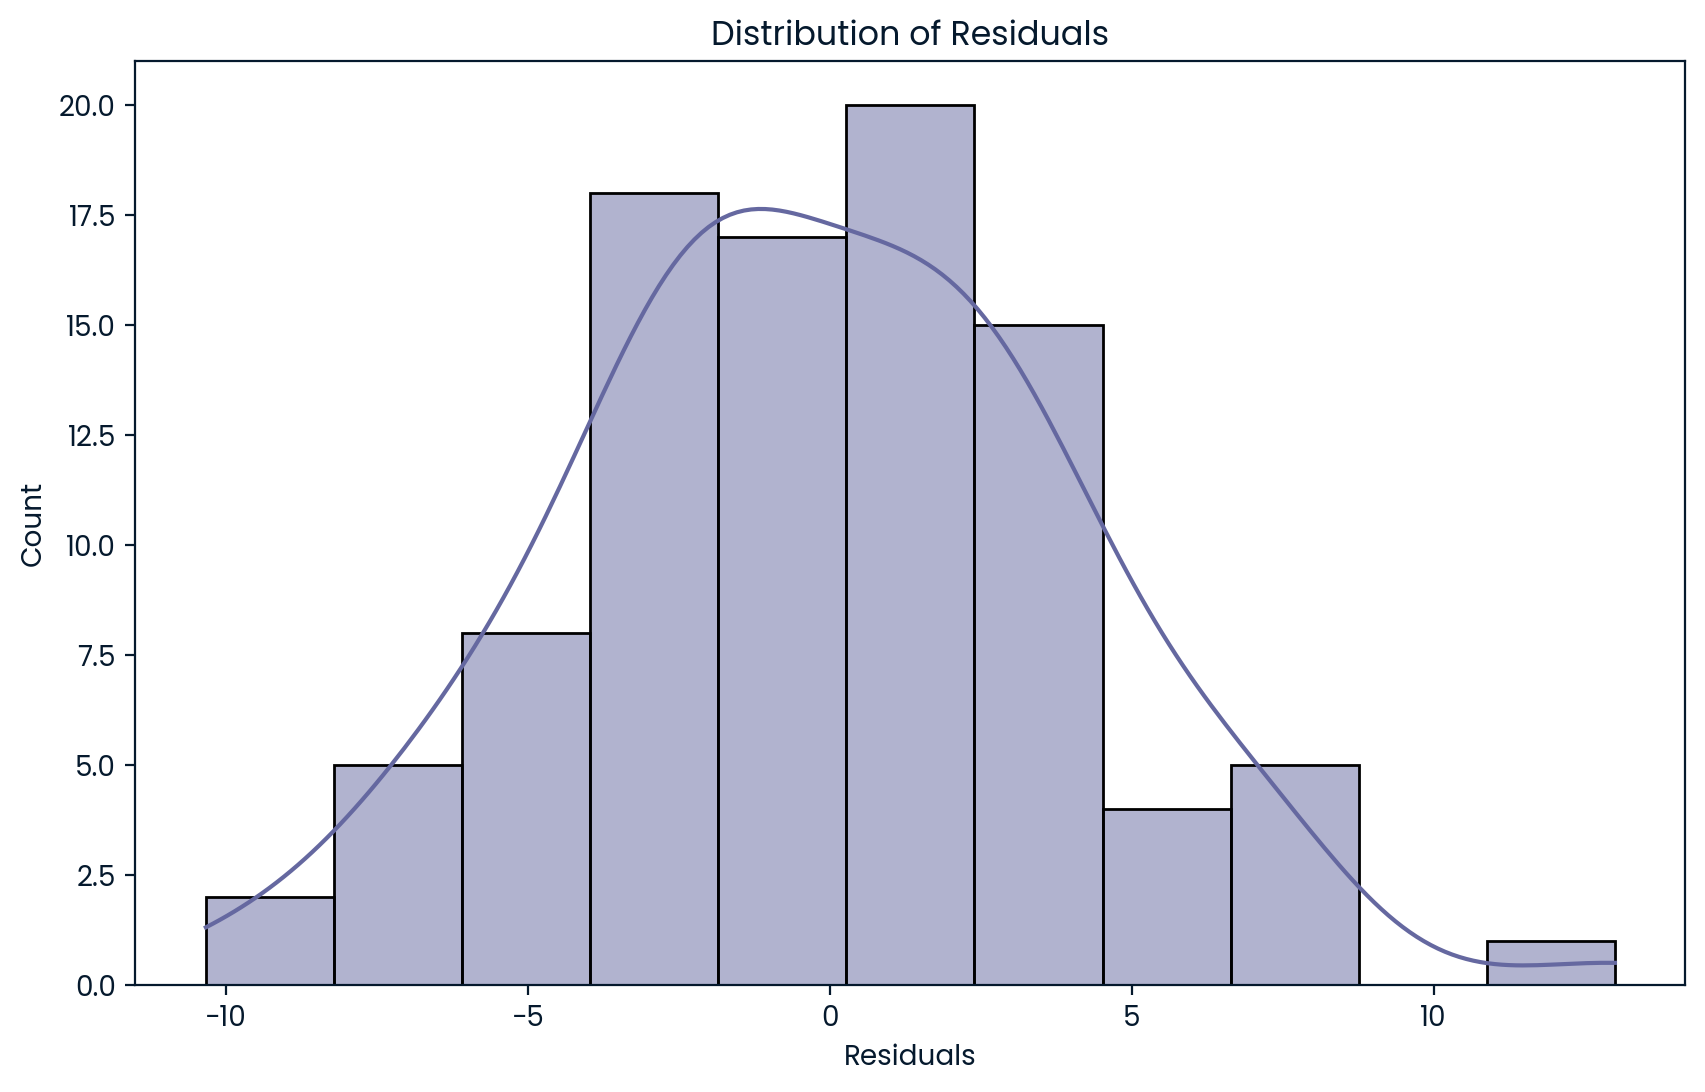

In [12]:
# Selecting the features and target variable
features = ['Goal_Difference', 'Normalized_Average_Market_Value']
X = data[features]
y = data['Points']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating the model
multi_lin_reg_model = LinearRegression()

# Fitting the model
multi_lin_reg_model.fit(X_train, y_train)

# Making predictions
predictions = multi_lin_reg_model.predict(X_test)

# Calculating the MAE
mae = metrics.mean_absolute_error(y_test, predictions)

# Displaying the metrics
print(f"Mean Absolute Error: {mae}")

# Visualization
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Residuals plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

Now we are able to generate a model which predicts the number of points a team will achieve in the Premier League when given its GD and normalized average market value for that year. It has a MAE of 2.98 which means the average prediction is 2.98 points off. Additionally, the graph of the residuals is approximately randomly distributed which means that the variation in the model is due to randomness and there is not another underlying trend that is not yet captured.

--

In [13]:
##MAY NEED FOR LATER
data2023 = pd.read_csv("2023PremData.csv")
data2023 = data2023[["Team", "Average_Market_Value"]]
for i in range(20):
    data2023["Average_Market_Value"][i] /= 57.74
data2023.rename(columns={"Average_Market_Value": "Normalized_Average_Market_Value"}, inplace=True)

teams = ['manchester city', 'arsenal fc', 'chelsea fc', 'liverpool fc', 'tottenham hotspur', 'manchester united', 'aston villa', 'newcastle united', 'brighton & hove albion', 'west ham united', 'brentford fc', 'crystal palace', 'nottingham forest', 'afc bournemouth', 'everton fc', 'wolverhampton wanderers', 'fulham fc', 'burnley fc', 'sheffield united', 'luton town']